# Working with personal data requests


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Part 1:

Import your own personal data file (or better yet, several of them!). Extract just the timestamp data. Export this timestamp data as a CSV file and save it on your machine.

In [2]:
search_hist = pd.read_json("SearchQueries.json")

In [3]:
def truncateTime(timestamp):
    return(timestamp[:19])

In [4]:
truncateTime('2023-07-29T05:29:30.638Z[UTC]')

'2023-07-29T05:29:30'

In [5]:
search_hist['Time_Short']=search_hist['searchTime'].apply(truncateTime)

In [6]:
search_hist['Time']=pd.to_datetime(search_hist['Time_Short'])

In [7]:
search_hist["Time"].to_csv("spotify_timestamps.csv")

In [8]:
df_spotify = pd.read_csv("spotify_timestamps.csv")

# Part 2:

In [9]:
timestamps = pd.read_csv("maniko.csv")

In [10]:
timestamps['datetime'] = pd.to_datetime(timestamps['time'])

In [11]:
time_sorted = timestamps.sort_values(by = 'datetime', ascending = True)

In [12]:
# Creating a new column that shows the difference between the time stamps. Obviously the first entry should be NaT.
time_sorted['difference'] = time_sorted['datetime'].diff()

In [13]:
# what is the max difference? what is the average difference?
print(time_sorted['difference'].max())
print(time_sorted['difference'].mean())

0 days 01:42:07
0 days 00:00:04.465730014


The longest in between timestamps is 1 hour 42 minutes and 7 seconds. The average time in between time stamps is about 4.5 seconds. 

In [14]:
time_sorted['day'] = (pd.DatetimeIndex(time_sorted['datetime']).day )

time_sorted['month'] = pd.DatetimeIndex(time_sorted['datetime']).month 

time_sorted['month.day'] = time_sorted['day']/100+time_sorted['month']

In [15]:
# Finding the most common day in the dataset. 
time_sorted['day'].mode()
# Creating a new dataframe of instances on the 26th
df_26 = time_sorted[time_sorted['day']==26]
df_26.describe()

,Unnamed: 0,difference,day,month,month.day
count,35591.000000,35591,35591.0,35591.0,3.559100e+04
mean,240010.000000,0 days 00:00:02.427636200,26.0,10.0,1.026000e+01
std,10274.381052,0 days 00:00:22.067636824,0.0,0.0,5.149731e-12
min,222215.000000,0 days 00:00:00,26.0,10.0,1.026000e+01
25%,231112.500000,0 days 00:00:00,26.0,10.0,1.026000e+01
50%,240010.000000,0 days 00:00:00,26.0,10.0,1.026000e+01
75%,248907.500000,0 days 00:00:01,26.0,10.0,1.026000e+01
max,257805.000000,0 days 00:17:27,26.0,10.0,1.026000e+01


There were 35591 instances on the 26th.

In [16]:
# Finding what month had the most instances
time_sorted['month'].mode()

0    10
Name: month, dtype: int64

In [17]:
df_oct = time_sorted[time_sorted['month']==10]

In [18]:
df_oct.describe()

,Unnamed: 0,difference,day,month,month.day
count,393102.000000,393101,393102.000000,393102.0,393102.000000
mean,326589.500000,0 days 00:00:04.329429332,21.951384,10.0,10.219514
std,113478.917096,0 days 00:00:34.986116235,5.663814,0.0,0.056638
min,130039.000000,0 days 00:00:00,12.000000,10.0,10.120000
25%,228314.250000,0 days 00:00:00,17.000000,10.0,10.170000
50%,326589.500000,0 days 00:00:00,22.000000,10.0,10.220000
75%,424864.750000,0 days 00:00:02,26.000000,10.0,10.260000
max,523140.000000,0 days 01:42:07,31.000000,10.0,10.310000


There were 393101 timestamps in October. wow!

Text(0, 0.5, 'Number of Instances')

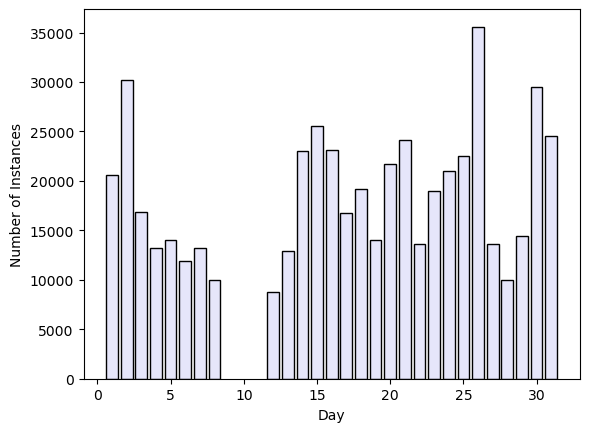

In [19]:
plt.bar(time_sorted['day'].value_counts().keys(), time_sorted['day'].value_counts(), color = 'lavender', edgecolor = 'black')
plt.xlabel('Day')
plt.ylabel('Number of Instances')

This visualization can tell us what days that the data is gathered on and how many times it was gathered on that day. The gap in data for 9,10, and 11 is due to data not being collected on the 9th, 10th, or 11th. Unfortunately,  the data only has day values and does not include months in relation to the day. So, 15 includees all values from October 15 and November 15. In this case, it shows that data was not gathered on the 9th, 10th, or 11th. Interesting!

7. What do you think the source of this data is? Write a few sentences explaining your reasoning, as well as what other data might help you verify if you are correct?

I think that the source of this data could be google activity because of how many data points there are per day. By google activity, I mean activity in all of Maniko's google applications. I don't think it is restricted to actions that Maniko initiated himself, background functions are still recorded. This would explain how the time difference never got above 2 hours. 

8. Exchange your analysis with your partner. Read your partner's analysis -- does it seem accurate? Did they guess the correct data source (or type of data source)?

Yes, it seemed accurate. Maniko guessed that it was some kind of search history based on the fact that the times were either very spread apart or really close together. 

9. For the days and months that your partner identified as having the most timestamps in your data, try to figure out what was happening on those days. What other data might help you figure this out?

I think the days that have more timestamps could be days that he spent more time on the computer. Perhaps they are days he wrote essays on or even possibly days he attended our class. Both of these reasons could explain an increase in online footprint, so to speak. 

# Part 3:

In [20]:
time_sorted2 = pd.read_csv('time_sorted.csv')
search_hist2 = pd.read_csv('search_hist.csv')

Text(0, 0.5, 'Percent of Responses')

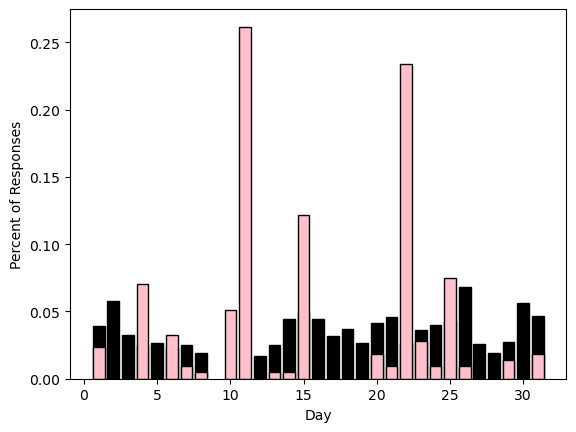

In [21]:
plt.bar(time_sorted2['day'].value_counts().keys(), time_sorted2['day'].value_counts()/len(time_sorted2['day']), color = 'black', edgecolor = 'black')

plt.bar(search_hist2['day'].value_counts().keys(), search_hist2['day'].value_counts()/len(search_hist2['day']), color = 'pink', edgecolor = 'black')

plt.xlabel("Day")
plt.ylabel("Percent of Responses")


We noticed that Maniko's data is much more evenly distributed amongst the different days. Jacob's data is very concentrated on certain days with larger gaps where no instances were found. It appears that most of Jacob's data can be found on the 11th and 22th days. 

# Part 4:

## Question 1: What song/songs have a searched for the most?

<BarContainer object of 186 artists>

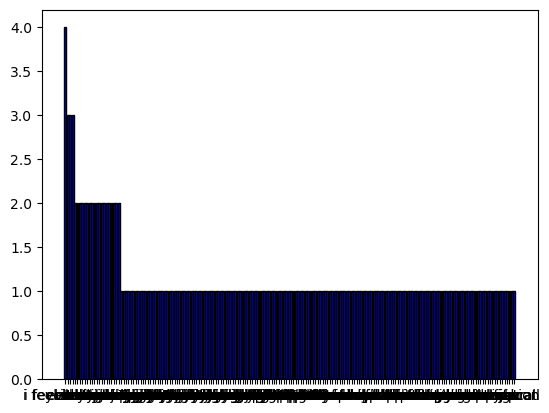

In [22]:
plt.bar(search_hist['searchQuery'].value_counts().keys(), search_hist['searchQuery'].value_counts(), color = 'blue', edgecolor = 'black')

Interestingly enough, in 3 months, I only repeated 5 searches: t, d, ever, e, ev. Probably just typos! I noticed that almost every search query I made had some kind of typo which made it hard to group them. Perhaps a future project could be to design a machine learning program to group my search queries into groups by key words or something like that. This made it very hard to answer my question. 

## Question 2: What time of day do I most commonly search for music?

In [23]:
search_hist['hour']=search_hist['Time'].dt.hour

Wait but this is saying that I make most of my search inquires very early in the morning? I realized that the to_datetime function takes the time to UTC which is 8 hours ahead of pacific standard time. Therefore, I need to subtract 8 mod 24 from each of the hours to find the actual time I searched at. 

In [24]:
search_hist['hour_adj']=(search_hist['hour']-8)%24

Text(0, 0.5, 'Number of Searches')

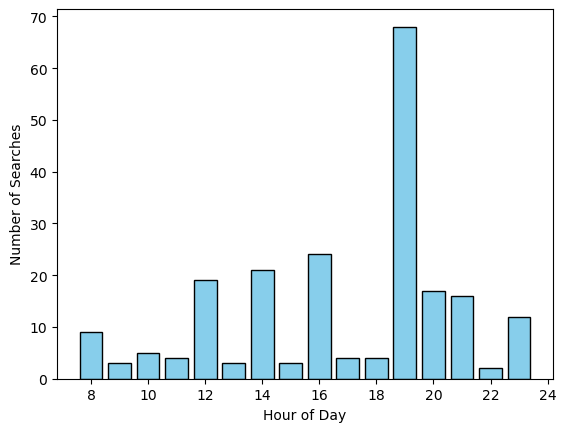

In [25]:
plt.bar(search_hist['hour_adj'].value_counts().keys(), search_hist['hour_adj'].value_counts(), color = 'skyblue', edgecolor = 'black')

plt.xlabel("Hour of Day")
plt.ylabel("Number of Searches")

According to this chart, I did not ever make spotify searches between the hours of 11pm and 8am during the months of july to october 2023. Also, I often make spotify searches at 7pm. 